In [327]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h3>1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [328]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h3>2.Подготовьте датасет к обучению моделей.
<h4>a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [330]:
obj = data.select_dtypes(include=['object'])
#num = data.select_dtypes(include=['number'])
df = pd.get_dummies(data, columns = obj.columns)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [331]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

<h4>b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

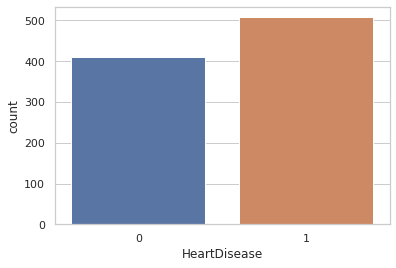

In [332]:
sns.countplot(x=df['HeartDisease'])

значения целевой переменной можно считать сбалансированными

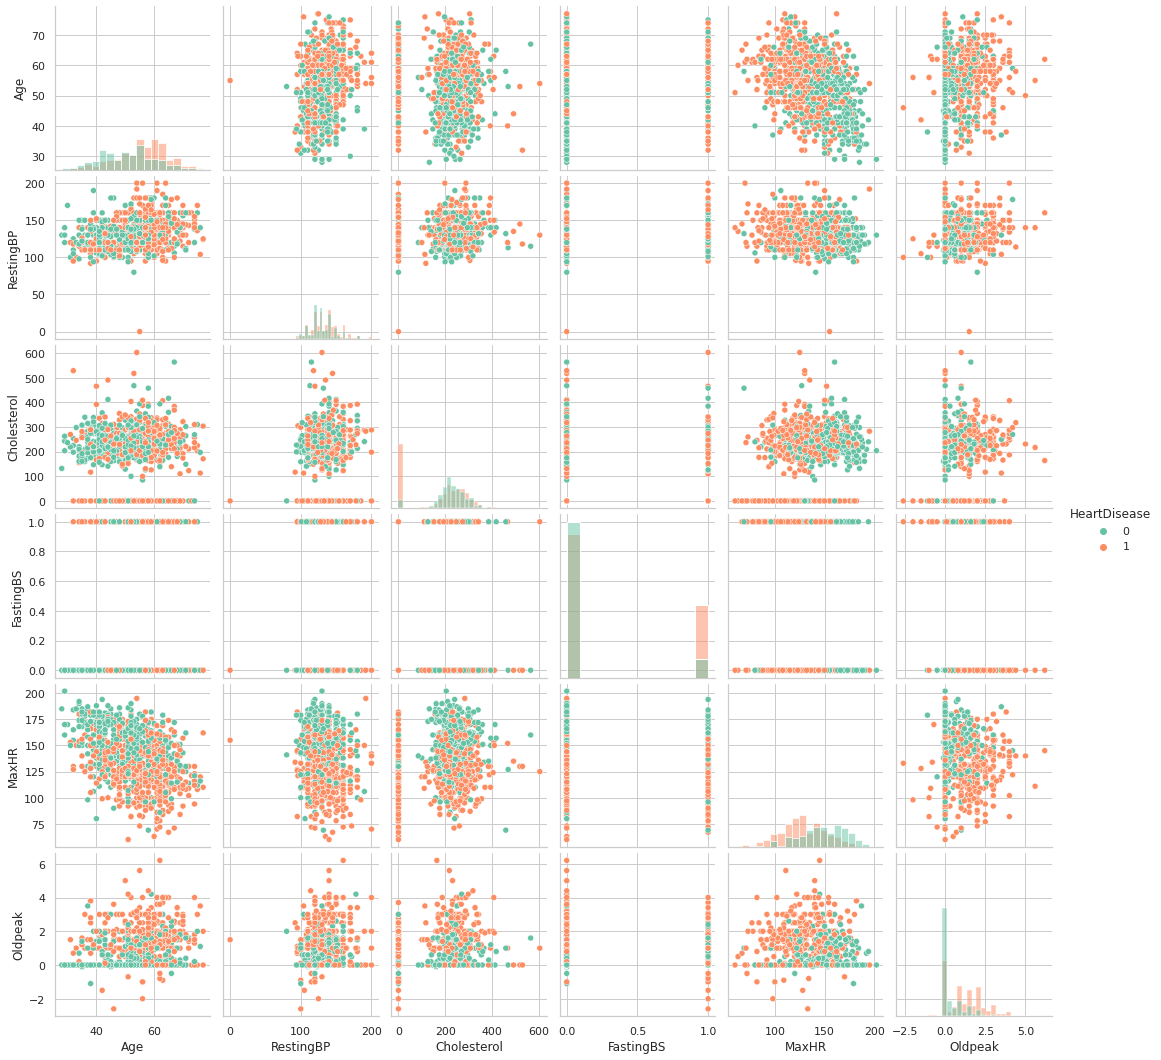

In [333]:
# построим распределение целевой переменной по признакам
sns.pairplot(data, hue="HeartDisease", diag_kind="hist",palette='Set2')#, kind="kde")

<h3>3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h3>4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
<h4>a) tree.DecisionTreeClassifier

In [335]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<h4>b) ensemble.RandomForestClassifier

In [336]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,y_train)
y_pred2 = rf_clf.predict(X_test)

<h3>5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [337]:
from sklearn.metrics import classification_report
print('Tree.DecisionTreeClassifier:', '\n', classification_report(y_test, y_pred))
print('RandomForestClassifier:', '\n', classification_report(y_test, y_pred2))

Tree.DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        76
           1       0.84      0.81      0.83       108

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184

RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        76
           1       0.90      0.92      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



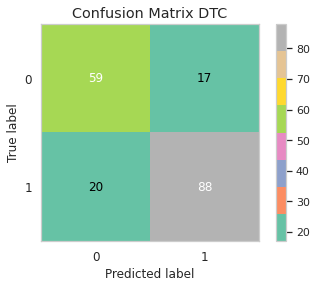

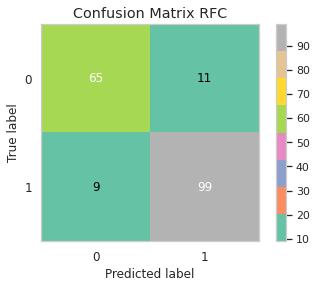

In [338]:
# Рассчитаем метрики качества
import scikitplot as skplt
СМ_DTC = skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix DTC",
                                    cmap="Set2",
                                    );
СМ_RFC = skplt.metrics.plot_confusion_matrix(y_test, y_pred2,
                                    normalize=False,
                                    title="Confusion Matrix RFC",
                                    cmap="Set2",
                                    );

<h3>6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

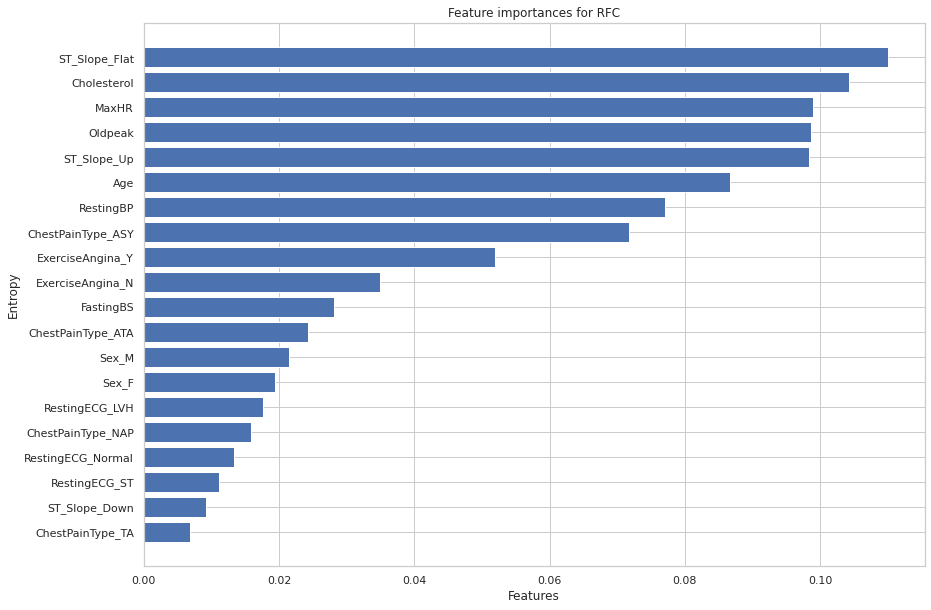

ST_Slope_Flat        0.110
Cholesterol          0.104
Oldpeak              0.099
MaxHR                0.099
ST_Slope_Up          0.098
Age                  0.087
RestingBP            0.077
ChestPainType_ASY    0.072
ExerciseAngina_Y     0.052
ExerciseAngina_N     0.035
FastingBS            0.028
ChestPainType_ATA    0.024
Sex_M                0.021
Sex_F                0.019
RestingECG_LVH       0.018
ChestPainType_NAP    0.016
RestingECG_Normal    0.013
RestingECG_ST        0.011
ST_Slope_Down        0.009
ChestPainType_TA     0.007
dtype: float64

In [339]:
imp = pd.Series(rf_clf.feature_importances_)
imp.index = pd.Series(X_train.columns)

plt.figure(figsize=(14,10))
plt.title('Feature importances for RFC')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.barh(imp.sort_values(ascending=True).index, imp.sort_values(ascending=True))
plt.show()
imp.round(3).sort_values(ascending=False)

явно выраженных лидеров среди признаков нет

<h3>7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [340]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
  
# классификатор по умолчанию
base_cls = DecisionTreeClassifier()

# параметры
model_BC = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = 100,
                          random_state = 42)

model_BC.fit(X_train, y_train)
y_pred3 = model_BC.predict(X_test)

<h4>a) Повторите п. 5

In [341]:
print('BaggingClassifier:', '\n', classification_report(y_test, y_pred3))

BaggingClassifier: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.91      0.91      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



<h3>8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [342]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
     ('DTR', DecisionTreeClassifier(criterion='entropy', random_state=42)),
     ('RFC', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('SVR', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42, dual = False)))]

StC = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

StC.fit(X_train, y_train)
y_pred4 = StC.predict(X_test)

<h4>a) Повторите п. 5

In [343]:
print('StackingClassifier:', '\n', classification_report(y_test, y_pred4))

StackingClassifier: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        76
           1       0.89      0.94      0.91       108

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



<h3>9.Сформулируйте выводы по проделанной работе.
<h4>a) Сравните метрики построенных моделей.

In [344]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
data2 = {'Метрики' : ['Accuracy_score', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'MAE', 'MSE','RMSE','r2_score'],
        'DecisionTreeClassifier (4a)' : [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)],
        'RandomForestClassifier (4b)': [accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), f1_score(y_test, y_pred2), roc_auc_score(y_test, y_pred2),mean_absolute_error(y_test, y_pred2), mean_squared_error(y_test, y_pred2), np.sqrt(mean_squared_error(y_test, y_pred2)), r2_score(y_test, y_pred2)],
        'BaggingClassifier (7a)' : [accuracy_score(y_test, y_pred3), precision_score(y_test, y_pred3), recall_score(y_test, y_pred3), f1_score(y_test, y_pred3), roc_auc_score(y_test, y_pred3),mean_absolute_error(y_test, y_pred3), mean_squared_error(y_test, y_pred3), np.sqrt(mean_squared_error(y_test, y_pred3)), r2_score(y_test, y_pred3)],
        'StackingClassifier (8a)' : [accuracy_score(y_test, y_pred4), precision_score(y_test, y_pred4), recall_score(y_test, y_pred4), f1_score(y_test, y_pred4), roc_auc_score(y_test, y_pred4),mean_absolute_error(y_test, y_pred4), mean_squared_error(y_test, y_pred4), np.sqrt(mean_squared_error(y_test, y_pred4)), r2_score(y_test, y_pred4)]
       }
frame = pd.DataFrame(data2).round(2)
frame

,Метрики,DecisionTreeClassifier (4a),RandomForestClassifier (4b),BaggingClassifier (7a),StackingClassifier (8a)
0,Accuracy_score,0.80,0.89,0.89,0.90
1,Precision,0.84,0.90,0.91,0.89
2,Recall,0.81,0.92,0.91,0.94
3,F1-Score,0.83,0.91,0.91,0.91
4,ROC AUC,0.80,0.89,0.89,0.89
5,MAE,0.20,0.11,0.11,0.10
6,MSE,0.20,0.11,0.11,0.10
7,RMSE,0.45,0.33,0.33,0.32
8,r2_score,0.17,0.55,0.55,0.57


<h4>b) Напишите свое мнение, какая модель наилучшая и почему.

Вывод: Худшие результаты показал метод DecisionTreeClassifier, в том числе это видно на неоптимальных результатах (precision) в Confusion Matrix. Кроме того следует отметить низкое значение r2_score, что указывает на переобучение модели (на train он равен 1). В тоже время его использование как основной модели в Бэггинге позволило улучшить показатели до уровня RandomForestClassifier и StackingClassifier. 
<br>Лучший результат показал Стэкинг, который включал базовые модели, а также LinearSVC, что в принципе незначительно повлияло на результат. Использование 'агрегированных' моделей Бэггинга и Стэкинга по идее должно давать лучшие показатели, что и подтвердили расчеты.
<br>В целом итоговые оценки моделей можно считать высокими, поскольку, например визуально на sns.pairplot не видно четкого деления на классы, а также нет явных сильных признаков (коэффициентов) для использования в классификации.
<br>Для повышения точности моделей целесообразно в дальнейшем использовать кроссвалидацию, применить другие методы классификации, в том числе в бэггинге и стэкинге, а также оптимизировать параметры моделей.